# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
numericas = df.select_dtypes(include=np.number)
numericas.drop(columns=['Unnamed: 0', 'index'], inplace=True)
df.rename(columns={'Unnamed: 0' : 'ID'}, inplace=True)

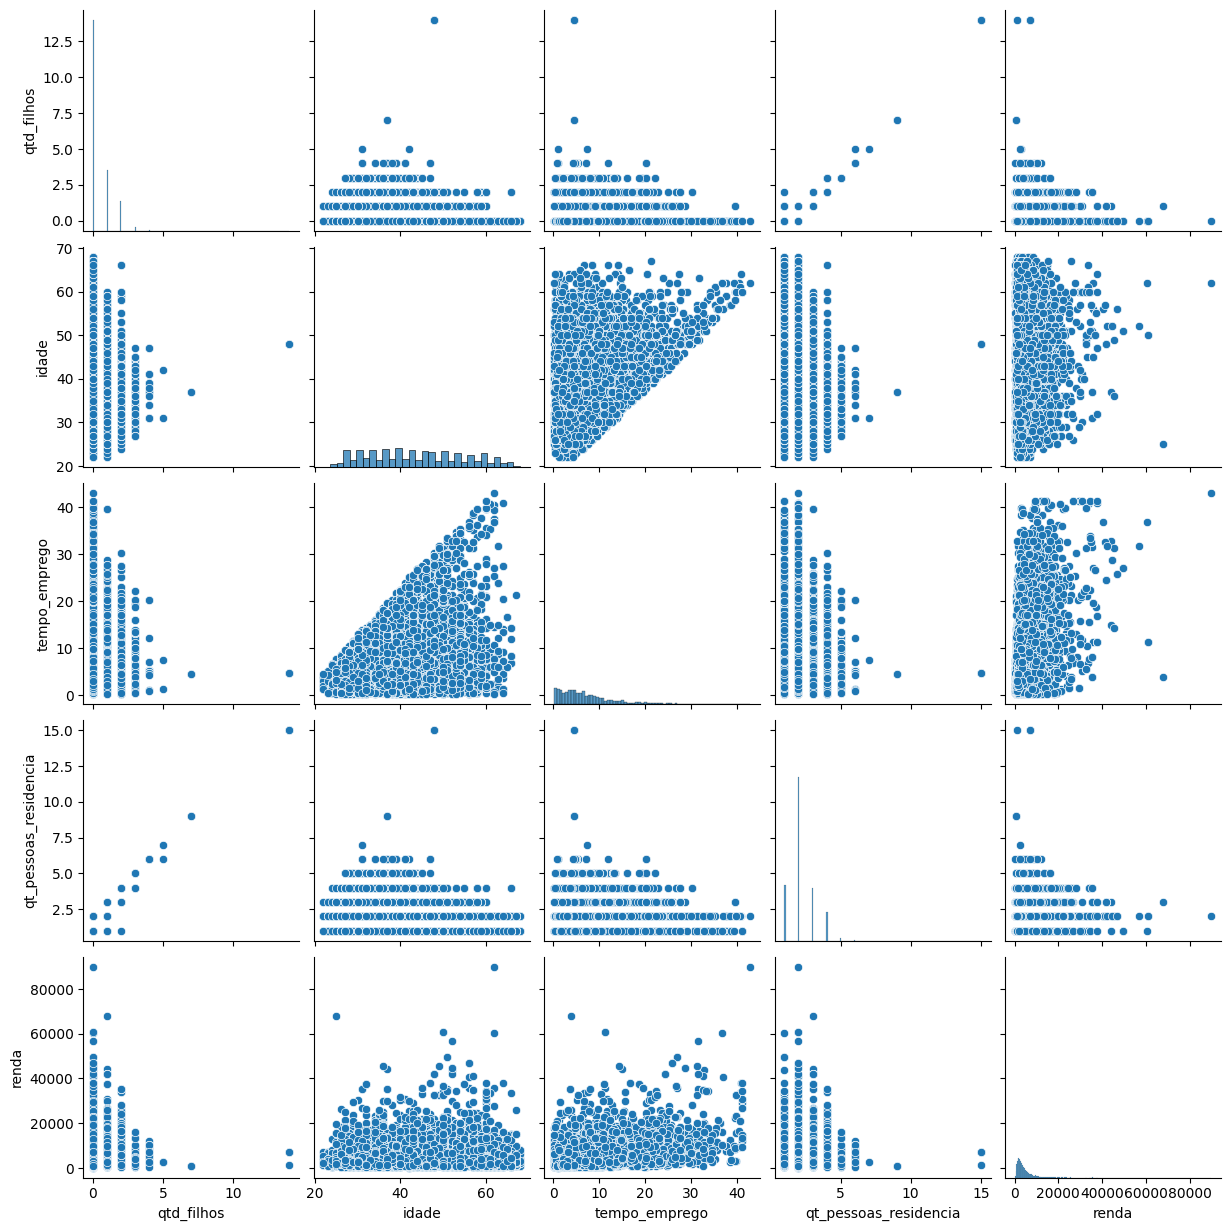

In [3]:
sns.pairplot(numericas)

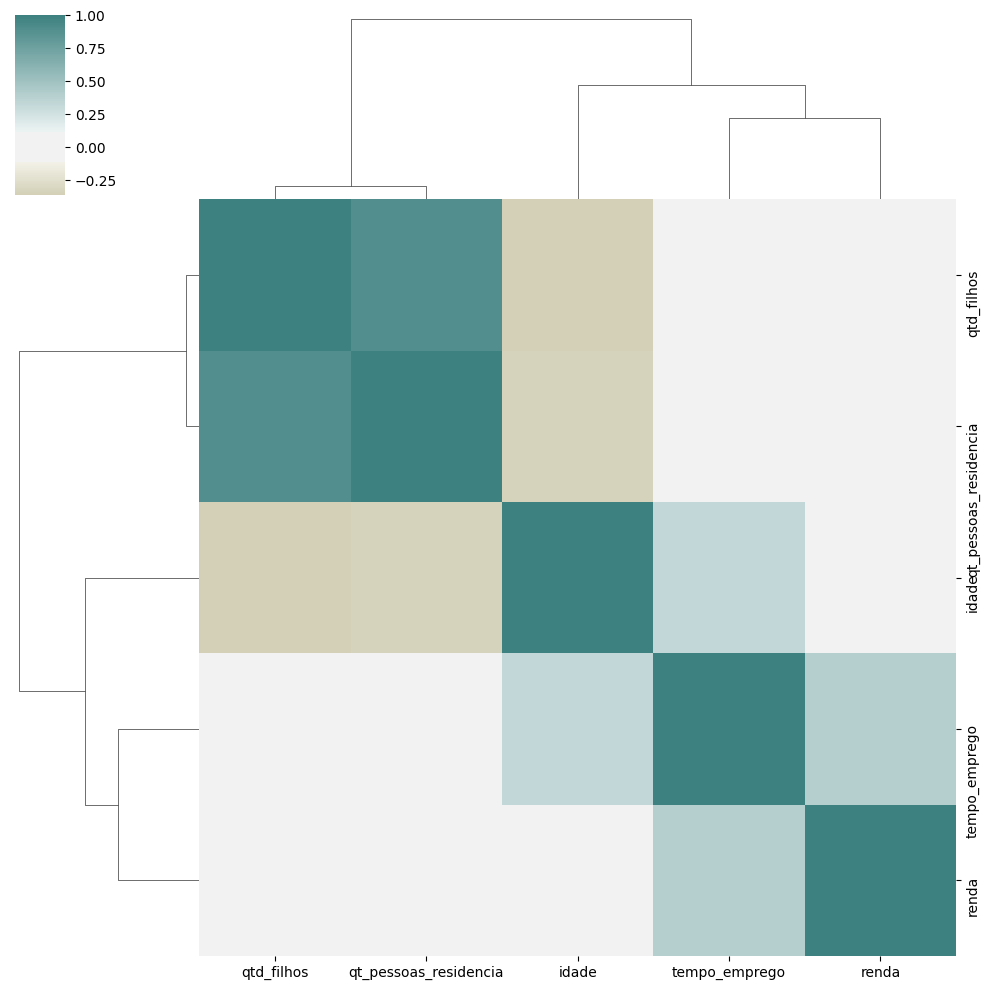

In [4]:
cmap = sns.diverging_palette(h_neg=80, h_pos=190, as_cmap=True, sep = 30, center = 'light')
sns.clustermap(numericas.corr(), figsize=(10, 10), center = 0, cmap=cmap)

    - Análise: as variáveis qtd_filhos e qt_pessoas_residencia possuem forte correlação. 
    Quanto maior o número de filhos, maior o número de pessoas morando na mesma residência.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot: xlabel='tempo_emprego', ylabel='renda'>

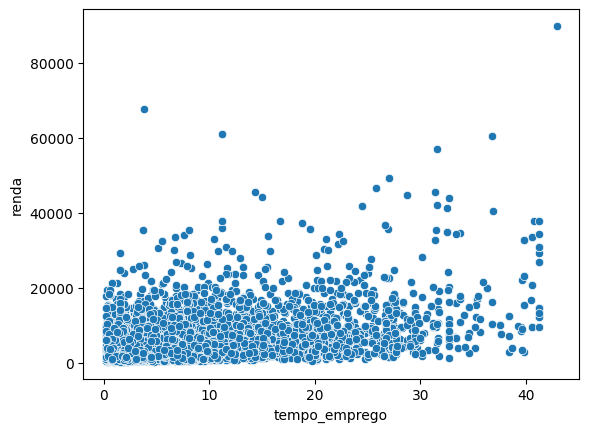

In [5]:
sns.scatterplot(data=numericas, x="tempo_emprego", y="renda")

<AxesSubplot: xlabel='idade', ylabel='renda'>

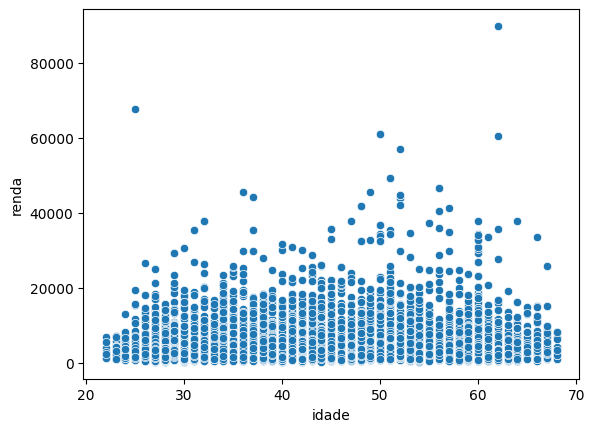

In [6]:
sns.scatterplot(data=numericas, x="idade", y="renda")

    - Análise: podemos verificar que na maioria dos casos não há um aumento da renda da pessoa 
    com relação ao tempo de emprego ou a idade

3. Na sua aopinião, há outliers na variável renda?

In [9]:
describe = df['renda'].describe()
describe

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

In [17]:
# calculando um intervalo com a média +/- 3 vezes do desvio padrão

media = describe['mean']
desvio = describe['std'] * 3

limite_superior = media + desvio
limite_inferior = media - desvio

df['renda_desvio'] = np.where(df['renda'] > limite_superior, limite_superior, np.where(
       df['renda'] < limite_inferior, limite_inferior, df['renda']
   )
)

In [11]:
df['renda_desvio'].describe()

count    15000.000000
mean      4471.695347
std       3770.690183
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      18510.348134
Name: renda_desvio, dtype: float64

<AxesSubplot: ylabel='renda_desvio'>

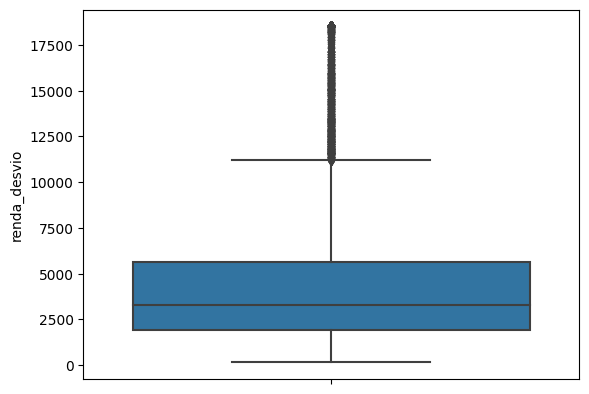

In [12]:
sns.boxplot(df, y='renda_desvio')

    - Sim, há outliers na variável renda porque existem registros que superam o intervalo
    calculado usando a média da renda + 3 vezes o desvio padrão.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [13]:
df_log = df.copy()
df_log['log_renda'] = np.log10(df_log['renda'])

Text(0.5, 1.0, 'Renda com log')

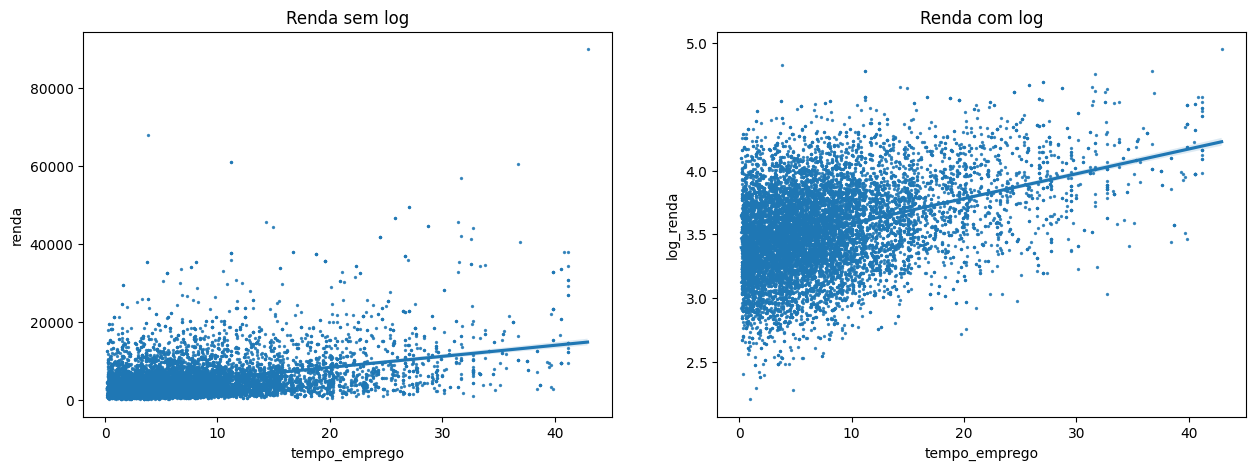

In [14]:
corr_renda = df_log[['tempo_emprego', 'renda', 'log_renda']].corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(ax=axes[0], x='tempo_emprego', y='renda', data=df_log, scatter_kws={'s':2})
sns.regplot(ax=axes[1], x='tempo_emprego', y='log_renda', data=df_log, scatter_kws={'s':2})
axes[0].set_title('Renda sem log')
axes[1].set_title('Renda com log')

Text(0.5, 1.0, 'Renda com log')

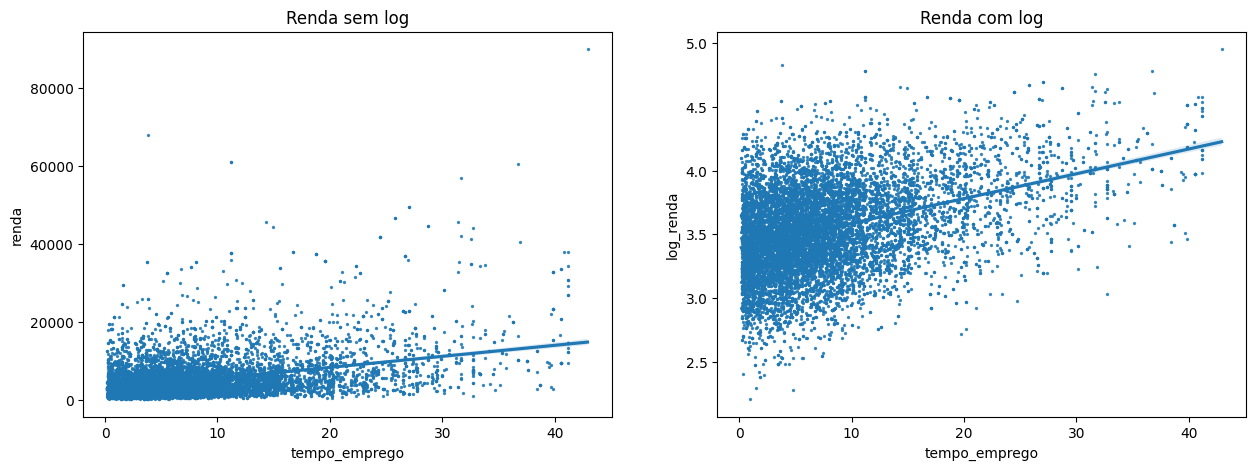

In [15]:
corr_renda = df_log[['tempo_emprego', 'renda', 'log_renda']].corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(ax=axes[0], x='tempo_emprego', y='renda', data=df_log, scatter_kws={'s':2})
sns.regplot(ax=axes[1], x='tempo_emprego', y='log_renda', data=df_log, scatter_kws={'s':2})
axes[0].set_title('Renda sem log')
axes[1].set_title('Renda com log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

    - A análise gráfica após o log ficou melhor pois podemos ver melhor a distribuição dos dados, 
    enquanto antes estavam concentrados